In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import feature
from keras.preprocessing import image
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import random
import pathlib
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

In [ ]:
train_path = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train'
dev_path = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/dev'
test_path = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/test'

In [ ]:
labels = []
for item in os.listdir(train_path):
  labels.append(item)

In [ ]:
def read_data(dir_path):
  image_list = []
  y = []
  for label in labels:
    path = os.path.join(dir_path, label)
    for item in os.listdir(path):
      image_list.append(path + '/' + item)
      y.append(label)
  return image_list, y

In [ ]:
X_train, y_train = read_data(train_path)
X_dev, y_dev = read_data(dev_path)
X_test, y_test = read_data(test_path)

In [ ]:
# Thử nhiều trường hợp chọn ra trường hợp tốt nhất
def TinhHog(pathfilename):
  img = cv2.imread(pathfilename,0)
  img = cv2.resize(img, (100, 100))
  (hog, hog_image) = feature.hog(img, orientations=9,pixels_per_cell=(6, 6), cells_per_block=(3, 3),block_norm='L2-Hys', visualize=True, transform_sqrt=True)

  return hog

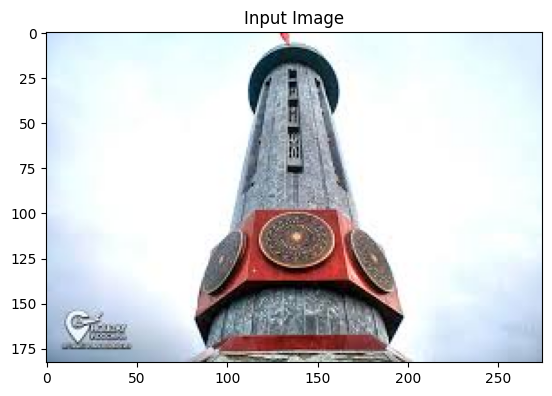

In [ ]:
img = cv2.imread(X_train[17])
plt.title("Input Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

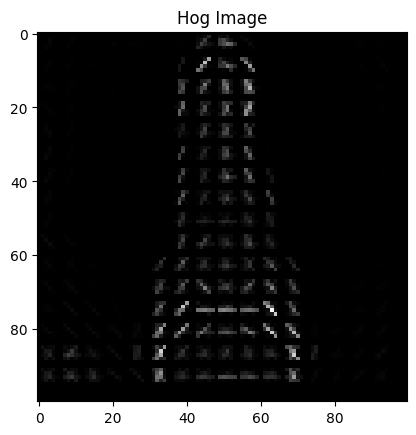

In [ ]:
_, img_hog = TinhHog(X_train[17])
plt.title("Hog Image")
plt.imshow(img_hog, cmap='gray');

In [ ]:
def feature_extraction(list_data):
  features = []
  for data in list_data:
    features.append(TinhHog(data))
  return features

In [ ]:
X_train = feature_extraction(X_train)
X_dev = feature_extraction(X_dev)
X_test = feature_extraction(X_test)

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(268, 15876)
(268,)


In [ ]:
X_train, X_dev, X_test = np.array(X_train), np.array(X_dev), np.array(X_test)
y_train, y_dev, y_test = np.array(y_train), np.array(X_test), np.array(y_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2077, 15876)
(2077,)
(268, 15876)
(268,)


# Train model

## Load model Softmax Regression

In [ ]:
import pickle
url = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Models/model_lr.pkl'
# Load model Softmax Regression
with open(url, 'rb') as file:
    model_lr = pickle.load(file)

## Softmax Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model_lr = LogisticRegression(multi_class='multinomial')
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = model_lr.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Accuracy:", acc)
print("Precision:", precision_score(y_pred, y_test, average='macro'))
print("Recall:", recall_score(y_pred, y_test, average='macro'))
print("F1-Score:", f1_score(y_pred, y_test, average='macro'))

Accuracy: 0.47761194029850745
Precision: 0.4804670329670329
Recall: 0.49541995586113236
F1-Score: 0.48099594341217883


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.38      0.45      0.42        11
          10       0.23      0.30      0.26        10
          11       0.46      0.67      0.55         9
          12       0.38      0.33      0.36        15
          13       0.38      0.29      0.33        17
          14       0.62      0.50      0.55        16
          15       0.71      0.59      0.65        17
          16       0.54      0.47      0.50        15
          17       0.69      0.60      0.64        15
          18       0.25      0.20      0.22        20
          19       0.53      0.40      0.46        20
           2       0.69      0.82      0.75        11
           3       0.43      0.43      0.43        14
           4       0.21      0.38      0.27         8
           5       0.67      0.73      0.70        11
           6       0.57      0.44      0.50        18
           7       0.23    

In [ ]:
x_test = X_test[0].reshape(1,-1)
y_pred = model_lr.predict(x_test)
print(f"y_pred: {y_pred}")
print(f"y_true: {y_test[0]}")

y_pred: ['11']
y_true: 11


## Save model

In [ ]:
import pickle
url = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Models/model_lr.pkl'
with open(url, 'wb') as file:
  pickle.dump(model_lr, file)

# SVM

## Load model SVM

In [ ]:
import pickle
url = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Models/model_svm_poly.pkl'
# Load model Softmax Regression
with open(url, 'rb') as file:
  model_poly = pickle.load(file)

## Polynomial Kernel

In [ ]:
from sklearn import svm

model_poly = svm.SVC(kernel='poly')
model_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred = model_poly.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Accuracy:",acc)
print("Precision:", precision_score(y_pred, y_test, average='macro'))
print("Recall:", recall_score(y_pred, y_test, average='macro'))
print("F1-Score:", f1_score(y_pred, y_test, average='macro'))

Accuracy: 0.5410447761194029
Precision: 0.542135989010989
Recall: 0.5820368520368521
F1-Score: 0.5418374199473271


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.38      0.62      0.48         8
          10       0.77      0.59      0.67        17
          11       0.38      0.83      0.53         6
          12       0.54      0.41      0.47        17
          13       0.23      0.23      0.23        13
          14       0.62      0.62      0.62        13
          15       0.86      0.60      0.71        20
          16       0.54      0.88      0.67         8
          17       0.77      0.50      0.61        20
          18       0.31      0.28      0.29        18
          19       0.67      0.42      0.51        24
           2       0.69      0.82      0.75        11
           3       0.36      0.45      0.40        11
           4       0.43      0.46      0.44        13
           5       0.58      0.78      0.67         9
           6       0.71      0.50      0.59        20
           7       0.31    

In [ ]:
x_test = X_test[17].reshape(1,-1)
y_pred = model_lr.predict(x_test)
print(f"y_pred: {y_pred}")
print(f"y_true: {y_test[17]}")

y_pred: ['14']
y_true: 14


## Save model

In [ ]:
import pickle
url = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Models/model_svm_poly.pkl'
with open(url, 'wb') as file:
  pickle.dump(model_poly, file)